# Predefined Functions

In [29]:
def step_gradient(X,Y, learning_rate, m, c):
    m_check = [0.0 for i in range(13)]
    m_slope = np.array(m_check)
    c_slope = 0
    
    M = len(X)
    
    for i in range(M):
        half_sum = 0
        for j in range(len(m)):
            half_sum+= m[j] * X[i][j]
            
        half_sum+= c
        
        for j in range(len(m)):
            m_slope[j] += (-2/M)*(Y[i][0]-half_sum)*X[i][j]
        
        c_slope += (-2/M)*(Y[i][0]-half_sum)
        
        m -= learning_rate * m_slope
        c -= learning_rate * c_slope
    return m, c
    

In [30]:
def cost(X, Y, m , c):
    total_cost = 0
    M = len(X)
    for i in range(M):
        half_sum = 0
        for j in range(len(m)):
            half_sum+= m[j]*X[i][j]
        half_sum+=c
        
        total_cost += (1/M)*((Y[i][0]-half_sum)**2)
    return total_cost

In [31]:
def gd(X, Y, learning_rate, num_iterations):
    m_array = [0.0 for i in range(13)]
    m = np.array(m_array)
    c = 0
    
    for i in range(num_iterations):
        m,c = step_gradient(X,Y,learning_rate, m,c)
        print(i, "Cost = ", cost(X,Y,m,c))
        
    return m,c

In [32]:
def run(X_train, Y_train, learning_rate, num_iterations):
    m,c = gd(X_train,Y_train, learning_rate, num_iterations)
    print(m,c)
    return m,c

In [33]:
def score(Y_pred, Y_ori):
    Y_new = (Y_ori - Y_pred)**2
    u = Y_new.sum()

    M = len(Y_ori)
    sum1 = Y_ori.sum()
    
    mean1 = sum1/M
    
    Y_new2 = (Y_ori - mean1)**2
    v = Y_new2.sum()
    
    return (1 - (u/v))
    

In [34]:
def predict(X_test, m , c):
    predictions = []

    for i in range(len(X_test)):
        pred = 0
        for j in range(len(m)):
            pred += m[j]*X_test[i][j]
        pred+=c
    
        predictions.append([pred])
    
    Y_pred = np.array(predictions)
    
    return Y_pred


# Original Code

In [35]:
import numpy as np

In [36]:
#Load Data from CSV
data = np.loadtxt("train.csv", delimiter = ",")
data.shape

(379, 14)

In [37]:
#Split data into X and Y
X = data[:, :13]
X.shape

(379, 13)

In [38]:
Y = data[:, 13:14]
Y.shape

(379, 1)

In [39]:
#Split data into testing data and training data
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y)

In [40]:
m,c = run(X_train, Y_train, 0.002, 300)

0 Cost =  164.75800748618087
1 Cost =  73.09749848713952
2 Cost =  49.27946648207256
3 Cost =  43.715924303959994
4 Cost =  38.931990771987564
5 Cost =  38.73412150509757
6 Cost =  35.478496101261065
7 Cost =  35.811608108643156
8 Cost =  33.022789150336415
9 Cost =  33.474950100376816
10 Cost =  31.03875016470678
11 Cost =  31.540960352234823
12 Cost =  29.40274030566993
13 Cost =  29.929378298853177
14 Cost =  28.045146016040697
15 Cost =  28.581656008497944
16 Cost =  26.915231603162162
17 Cost =  27.451748163317056
18 Cost =  25.973356503641163
19 Cost =  26.502692183483422
20 Cost =  25.187615871466146
21 Cost =  25.704419713683414
22 Cost =  24.531918422594728
23 Cost =  25.032230474160645
24 Cost =  23.984728824321238
25 Cost =  24.465691311244747
26 Cost =  23.528172841633474
27 Cost =  23.987815674323883
28 Cost =  23.147364026212554
29 Cost =  23.58443362269191
30 Cost =  22.829877952183907
31 Cost =  23.243696192287704
32 Cost =  22.5653314738222
33 Cost =  22.95567814630874

279 Cost =  21.321662472957282
280 Cost =  21.321655692760665
281 Cost =  21.321665886199913
282 Cost =  21.32165974954883
283 Cost =  21.321669136613377
284 Cost =  21.3216635852184
285 Cost =  21.32167223141561
286 Cost =  21.321667212136923
287 Cost =  21.321675177556834
288 Cost =  21.321670641955528
289 Cost =  21.32167798172401
290 Cost =  21.321673885652324
291 Cost =  21.32168065034614
292 Cost =  21.321676953573036
293 Cost =  21.321683189599806
294 Cost =  21.321679855468975
295 Cost =  21.321685605415297
296 Cost =  21.321682600532633
297 Cost =  21.321687903482804
298 Cost =  21.321685197431158
299 Cost =  21.321690089259157
[-0.89923086  0.84359977  0.02465294  0.4398408  -2.69384137  1.90627693
  0.24556297 -3.28743694  3.37121641 -2.50736597 -2.74413667  0.71302427
 -3.82483096] 22.60709914772841


In [41]:
Y_pred = predict(X_test, m, c)

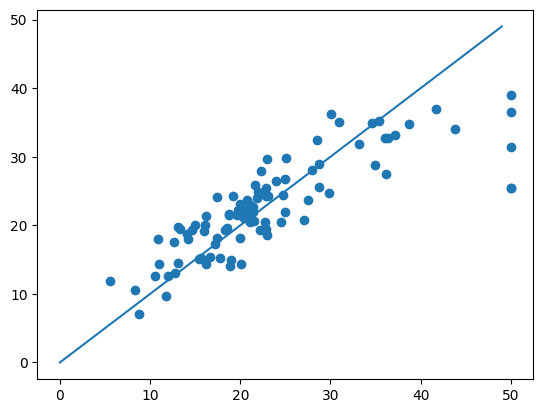

In [42]:
import matplotlib.pyplot as plt

one = np.arange(0,50, 1)
plt.plot(one,one)
plt.scatter(Y_test, Y_pred)
plt.show()

In [43]:
score(Y_pred, Y_test)

0.6619400485697473

In [44]:
Y_pred2 = predict(X_train, m, c)

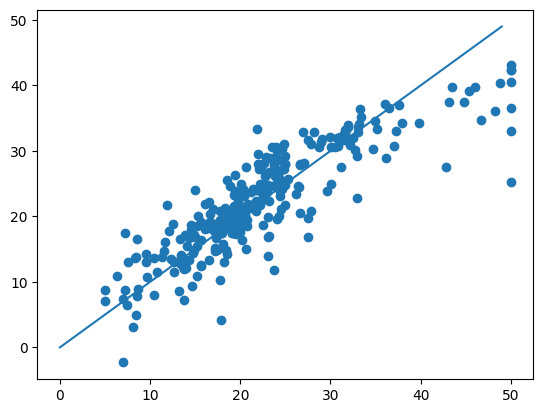

In [45]:
import matplotlib.pyplot as plt

one = np.arange(0,50, 1)
plt.plot(one,one)
plt.scatter(Y_train, Y_pred2)
plt.show()

In [46]:
score(Y_pred2, Y_train)

0.7488647219509679